# Exploratory Data Analysis (EDA) — NASA CMAPSS FD001
### BIL539 – Artificial Intelligence Term Project
### Remaining Useful Life (RUL) Prediction

This notebook performs a complete exploratory data analysis (EDA) of the NASA C-MAPSS FD001 dataset.
All generated plots are automatically saved into `../reports/images/`.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn-v0_8')
sns.set()

# directory to save images
SAVE_DIR = '../reports/images/'
os.makedirs(SAVE_DIR, exist_ok=True)
def savefig(name):
    plt.savefig(os.path.join(SAVE_DIR, name), dpi=200, bbox_inches='tight')
    print(f'Saved: {name}')

In [7]:
train_path = '../data/raw/train_FD001.txt'
test_path  = '../data/raw/test_FD001.txt'
rul_path   = '../data/raw/RUL_FD001.txt'

train = pd.read_csv(train_path, sep=r"\s+", header=None)
test  = pd.read_csv(test_path,  sep=r"\s+", header=None)
rul_test = pd.read_csv(rul_path, header=None, names=['RUL'])

cols = ['unit','time','os1','os2','os3'] + [f's{i}' for i in range(1,22)]
train.columns = cols
test.columns = cols
train.head()

,unit,time,os1,os2,os3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [8]:
max_time = train.groupby('unit')['time'].max().reset_index()
max_time.columns = ['unit','max_time']
train = train.merge(max_time, on='unit', how='left')
train['RUL'] = train['max_time'] - train['time']
train.drop(columns=['max_time'], inplace=True)
train.head()

,unit,time,os1,os2,os3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [9]:
print('Train shape:', train.shape)
print('Unique engines:', train['unit'].nunique())
engine_life = train.groupby('unit')['time'].max()
engine_life.describe()

Train shape: (20631, 27)
Unique engines: 100


count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: time, dtype: float64

In [10]:
sensor_cols = [c for c in train.columns if c.startswith('s')]
variances = train[sensor_cols].var()
variances

s1     0.000000e+00
s2     2.500533e-01
s3     3.759099e+01
s4     8.101089e+01
s5     2.840037e-29
s6     1.929279e-06
s7     7.833883e-01
s8     5.038938e-03
s9     4.876536e+02
s10    0.000000e+00
s11    7.133568e-02
s12    5.439850e-01
s13    5.172330e-03
s14    3.639005e+02
s15    1.406628e-03
s16    1.203765e-35
s17    2.398667e+00
s18    0.000000e+00
s19    0.000000e+00
s20    3.266927e-02
s21    1.171825e-02
dtype: float64

Saved: sensor_variances.png


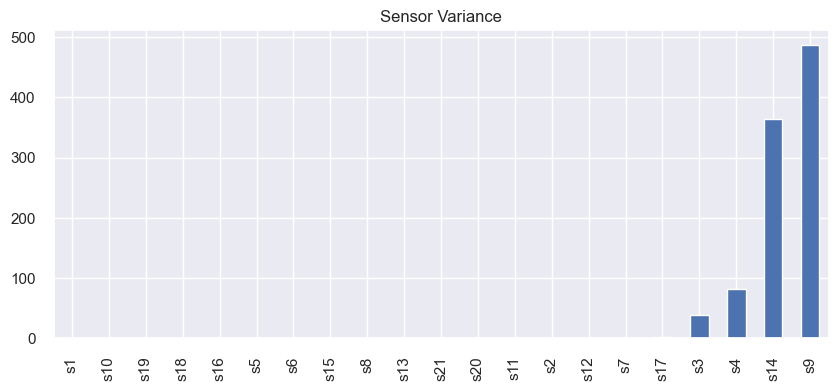

In [11]:
plt.figure(figsize=(10,4))
variances.sort_values().plot(kind='bar')
plt.title('Sensor Variance')
savefig('sensor_variances.png')
plt.show()

In [12]:
corr_with_rul = train[sensor_cols].apply(lambda x: x.corr(train['RUL']))
corr_sorted = corr_with_rul.sort_values()
corr_sorted

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


s11   -6.962281e-01
s4    -6.789482e-01
s15   -6.426670e-01
s2    -6.064840e-01
s17   -6.061536e-01
s3    -5.845204e-01
s8    -5.639684e-01
s13   -5.625688e-01
s9    -3.901016e-01
s14   -3.067689e-01
s6    -1.283484e-01
s16   -5.849749e-16
s5     1.251872e-15
s20    6.294285e-01
s21    6.356620e-01
s7     6.572227e-01
s12    6.719831e-01
s1              NaN
s10             NaN
s18             NaN
s19             NaN
dtype: float64

Saved: sensor_rul_correlation.png


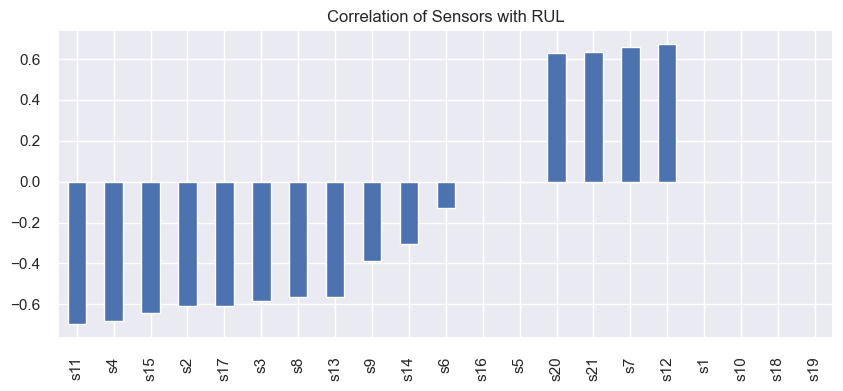

In [13]:
plt.figure(figsize=(10,4))
corr_sorted.plot(kind='bar')
plt.title('Correlation of Sensors with RUL')
savefig('sensor_rul_correlation.png')
plt.show()

Saved: sensor_sensor_heatmap.png


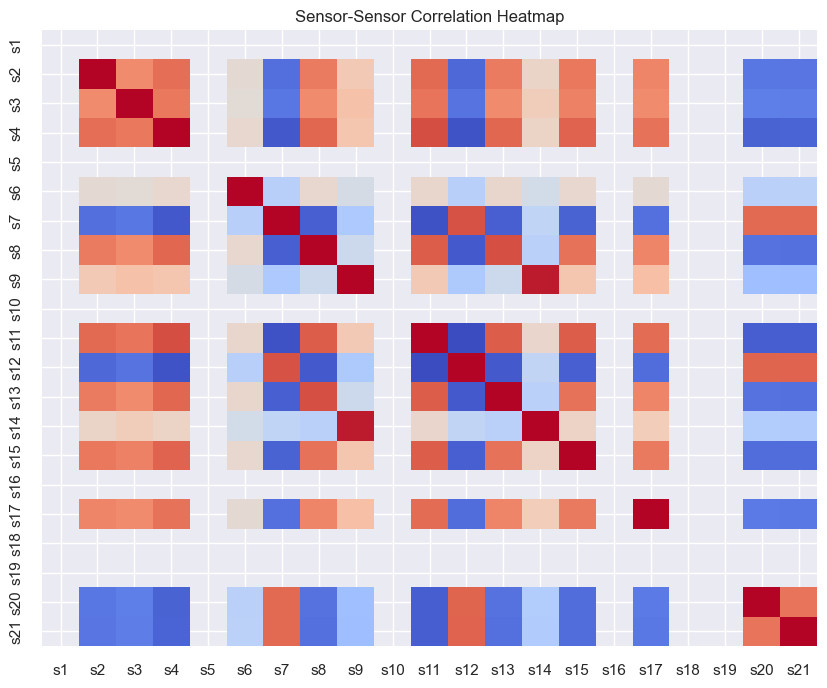

In [14]:
corr_matrix = train[sensor_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', cbar=False)
plt.title('Sensor-Sensor Correlation Heatmap')
savefig('sensor_sensor_heatmap.png')
plt.show()

Saved: rul_distribution.png


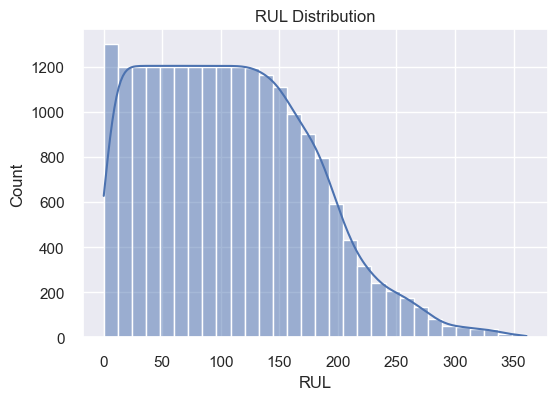

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(train['RUL'], bins=30, kde=True)
plt.title('RUL Distribution')
savefig('rul_distribution.png')
plt.show()